**Name**: Phonphrm Thawatdamrongkit
**Student ID**: 2330802

# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



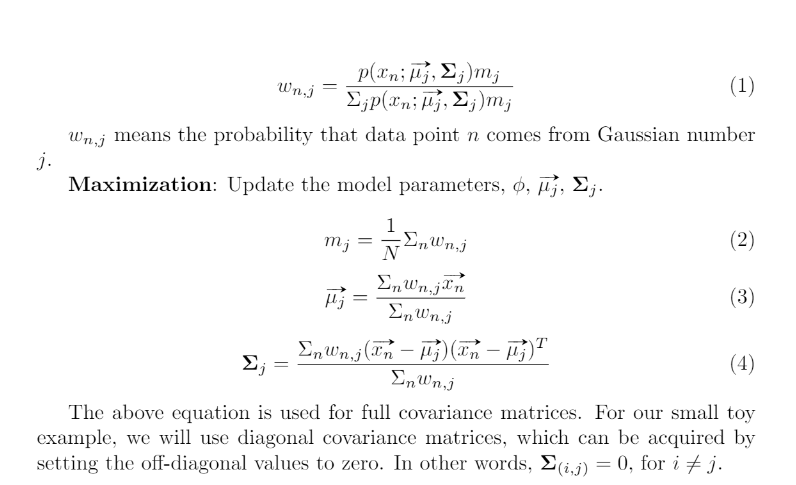

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [2]:
x = np.array([[1, 1], [5, 5]])
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[1, 1], [2,2], [-3,-1]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)


dist = []
for i in range(num_mixture):
    dist.append(multivariate_normal(mean=mean_params[i], cov=cov_params[i]))

out = []
for i in range(num_mixture):
    out.append(dist[i].pdf(x))

out = np.array(out).T * mixture_weight
denominator = np.sum(out, axis=1)

final = out/denominator[:, None]
final.shape, x.shape

((2, 3), (2, 2))

In [3]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """

        # INSERT CODE HERE
        
        # Create the gaussian distribution
        dist = []
        for i in range(self.mean_params.shape[0]):
            dist.append(multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i]))
        
        # Calculate the probability of each data point in each gaussian distribution (likelihood)
        likelihood = []
        for i in range(self.mean_params.shape[0]):
            likelihood.append(dist[i].pdf(data))
            
        likelihood = np.array(likelihood).T
        
        # Times the prior with the likelihood
        numerator = likelihood * self.mixture_weight
        
        # Calculate the marginalization (evidence) 
        denominator = np.sum(numerator, axis=1)[:, None]
        
        # Calculate the posterior
        w = numerator / denominator
        
        return w


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        
        # Calculate the new mixture weight by taking the mean along rows of calculated w
        self.mixture_weight = np.mean(w, axis=0)
        
        # Calculate the new mean_params
        self.mean_params = np.dot(w.T, data) / (np.sum(w, axis=0)[:, None] + 1e-9)
        
        # Calculate the cov_params
        for i in range(self.mean_params.shape[0]):
            
            cov_list = [] # List to store the new covariance value since we will ignore everything outside diagonal
            
            for j in range(data.shape[1]):
                diff_mean = data[:, j] - self.mean_params[i, j]
                wnj = w[:, i][:, None]
                
                diff_mean_T = diff_mean[:, None].T
                diff_mean = diff_mean[:, None] * wnj
                
                cov_numerator = np.dot(diff_mean_T, diff_mean)
                cov_denominator = np.sum(w[:, i], keepdims=True)
                
                cov_list.append((cov_numerator / cov_denominator))
            
            self.cov_params[i] = np.diag(np.array(cov_list).reshape(-1))
        

    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        # INSERT CODE HERE

        # Create the gaussian distribution
        dist = []
        for i in range(self.mean_params.shape[0]):
            dist.append(multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i]))
        
        # Calculate the probability of each data point in each gaussian distribution (likelihood)
        likelihood = []
        for i in range(self.mean_params.shape[0]):
            likelihood.append(dist[i].pdf(data))
            
        likelihood = np.array(likelihood).T
        
        # Times the prior with the likelihood
        numerator = likelihood * self.mixture_weight# Estimate the posterior
        
        # Calculate log prob based on the numerator
        log_prob = np.sum(np.log(np.sum(numerator, axis=1)))
     
        return log_prob

    def print_iteration(self):
        print("mixture_weight :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")
    
    def print_wnj(self, w, data):
        print("w_{n,j} :",)
        for i in range(w.shape[0]):
            # Loop each w
            current_w = [float(x) for x in w[i]]
            print(f"Sample:{data[i]} -> ", end="")
            for j in range(len(current_w)):
                print(f"mixture={j}: {current_w[j]:.3f}", end=", ")
            print()

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # INSERT CODE HERE
            
            # Perform E-step
            w = self.estimation_step(data)
            
            # Perform M-step
            self.maximization_step(data, w)

            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_wnj(w, data)
                self.print_iteration()

        return log_prob_list

In [4]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
mixture_weight :
 [1, 1, 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
w_{n,j} :
Sample:[1 2] -> mixture=0: 0.119, mixture=1: 0.881, mixture=2: 0.000, 
Sample:[3 3] -> mixture=0: 0.731, mixture=1: 0.269, mixture=2: 0.000, 
Sample:[2 2] -> mixture=0: 0.269, mixture=1: 0.731, mixture=2: 0.000, 
Sample:[8 8] -> mixture=0: 1.000, mixture=1: 0.000, mixture=2: 0.000, 
Sample:[6 6] -> mixture=0: 0.999, mixture=1: 0.001, mixture=2: 0.000, 
Sample:[7 7] -> mixture=0: 1.000, mixture=1: 0.000, mixture=2: 0.000, 
Sample:[-3 -3] -> mixture=0: 0.000, mixture=1: 0.000, mixture=2: 1.000, 
Sample:[-2 -4] -> mixture=0: 0.000, mixture=1: 0.000, mixture=2: 1.000, 
Sample:[-7 -7] -> mixture=0: 0.000, mixture=1: 0.000, mixture=2: 1.000, 
mixture_weight :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211 

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



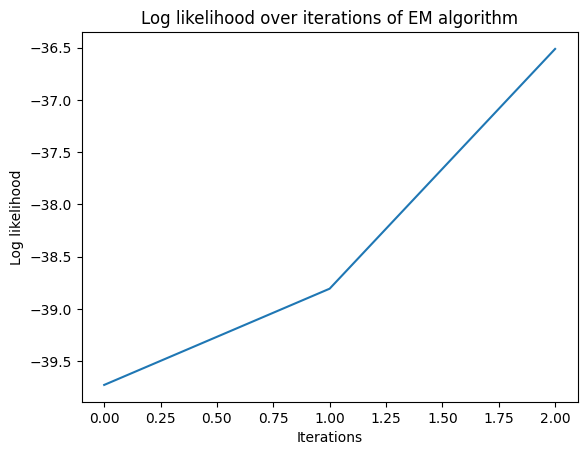

In [5]:
# TODO
plt.plot(log_prob_list)
plt.xlabel("Iterations")
plt.ylabel("Log likelihood")
plt.title("Log likelihood over iterations of EM algorithm")
plt.show()

    ANS : Yes it goes up every iteration just as we learned in class.

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [6]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
mixture_weight :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
w_{n,j} :
Sample:[1 2] -> mixture=0: 1.000, mixture=1: 0.000, 
Sample:[3 3] -> mixture=0: 1.000, mixture=1: 0.000, 
Sample:[2 2] -> mixture=0: 1.000, mixture=1: 0.000, 
Sample:[8 8] -> mixture=0: 1.000, mixture=1: 0.000, 
Sample:[6 6] -> mixture=0: 1.000, mixture=1: 0.000, 
Sample:[7 7] -> mixture=0: 1.000, mixture=1: 0.000, 
Sample:[-3 -3] -> mixture=0: 0.000, mixture=1: 1.000, 
Sample:[-2 -4] -> mixture=0: 0.000, mixture=1: 1.000, 
Sample:[-7 -7] -> mixture=0: 0.000, mixture=1: 1.000, 
mixture_weight :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iter

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

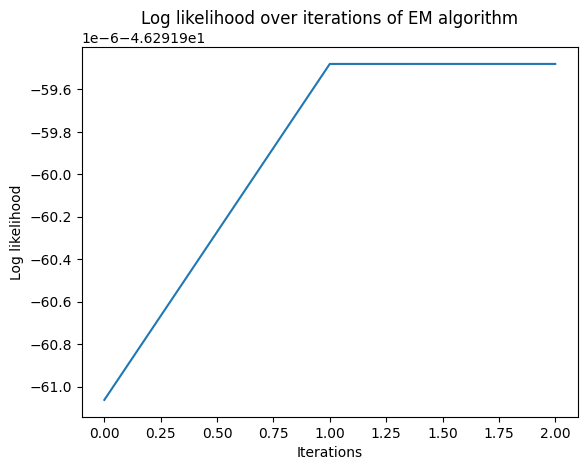

In [7]:
# TODO: Plot log_likelihood from T3
plt.plot(log_prob_list2)
plt.xlabel("Iterations")
plt.ylabel("Log likelihood")
plt.title("Log likelihood over iterations of EM algorithm")
plt.show()

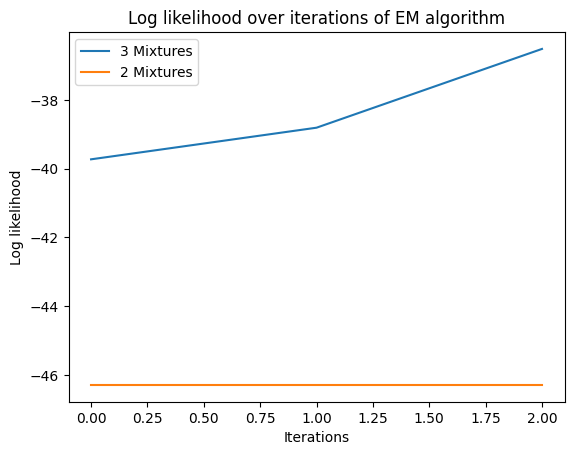

In [8]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
plt.plot(log_prob_list, label="3 Mixtures")
plt.plot(log_prob_list2, label="2 Mixtures")
plt.xlabel("Iterations")
plt.ylabel("Log likelihood")
plt.title("Log likelihood over iterations of EM algorithm")
plt.legend()
plt.show()

    ANS : Obviously, the three mixtures has the better likelihood than two mixtures.

### OT1. Using 2 mixtures, initialize your Gaussian with means (0,0) and (10000,10000). Explain what happens. From this case, explain how a proper initialization should be performed. What other tricks can be used to prevent this from happening?

In [9]:
# num_mixture = 2
# mixture_weight = [1] * num_mixture

# mean_params = np.array([[0,0], [10000, 10000]], dtype = float)
# cov_params = np.array([np.eye(2)] * num_mixture)

# # INSERT CODE HERE
# gmm3 = GMM(mixture_weight, mean_params, cov_params)
# log_prob_list3 = gmm3.perform_em_iterations(data, num_iterations)

    ANS : The initialization of the means is very important. If the means are initialized too far from the data, the algorithm will be collapsed in this case it causes the division by zero and the mixture weight for [0, 0] means are very high compared to [10000, 10000] means which is nearly zero.

# The face database

In [10]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [11]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [12]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

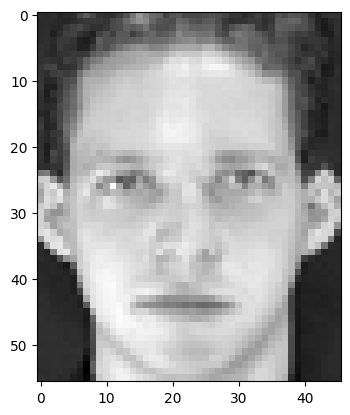

In [13]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [14]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """

    # Flatten both image to vectors form and reshape to row vector
    x1 = x1.reshape(1, -1)
    x2 = x2.reshape(1, -1)

    # Difference between x1 and x2
    diff = x1 - x2
    
    # Calculate the L2 distance
    return np.sqrt(np.dot(diff, diff.T).item())


# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


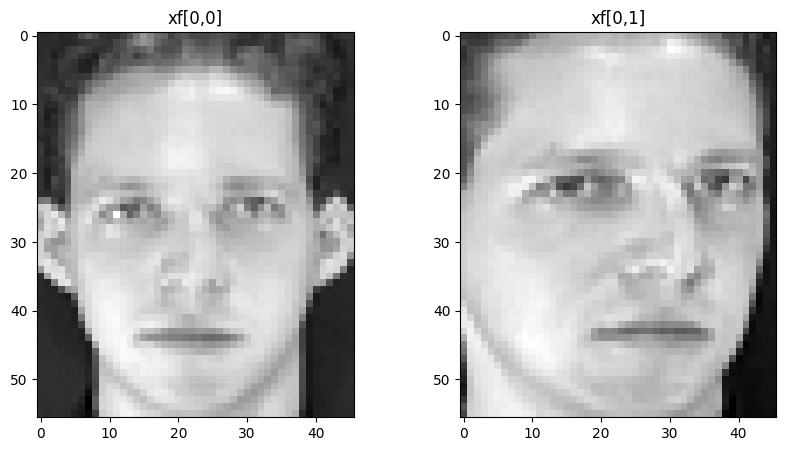

In [15]:
# TODO: Show why does the numbers make sense

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(xf[0,0], cmap = 'gray')
ax[0].set_title('xf[0,0]')
ax[1].imshow(xf[0,1], cmap = 'gray')
ax[1].set_title('xf[0,1]')
plt.show()

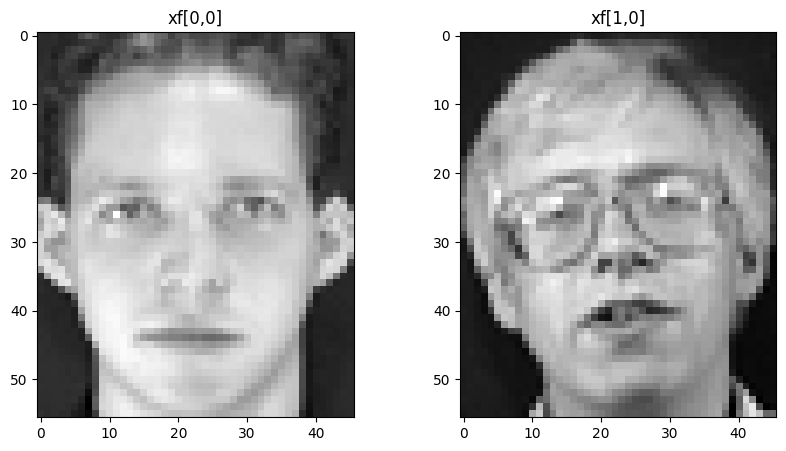

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(xf[0,0], cmap = 'gray')
ax[0].set_title('xf[0,0]')
ax[1].imshow(xf[1, 0], cmap = 'gray')
ax[1].set_title('xf[1,0]')
plt.show()

    ANS : The Euclidean distance results are shown below which doesn't provide the expected number that we wanted. The numbers depict that the image from the same person has a higher distance than the image from a different person. This might be because the orientation of the face is very different for the same person but the image from a different person has the same orientation so the distance is much smaller. Since, the Euclidean distance measures pixel by pixel so that it might be possible that orientation can play a crucial role for this face verification. The distance of the same person is smaller than the distance of difference person so the numbers make sense. As the resuls are shown, the Euclidean distance could be useful in face verification because we can use this measurement to compare if two images are from the same person or not. The smaller the distance refers to the same person and the larger the distance refers to the different person.

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [17]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    
    # Check dim and organize the shape
    if len(matrix.shape) == 2:
        matrix = matrix.reshape(matrix.shape[0], -1)
    elif len(matrix.shape) >= 3:
        matrix = matrix.reshape(matrix.shape[0]*matrix.shape[1], -1)
    return matrix


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    
    # Organize the matrix shape to have row vectors consist of all the pixels(flatten)
    A = organize_shape(A)
    B = organize_shape(B)
    
    # Calculate the similarity matrix
    similarity_matrix = np.zeros((A.shape[0], B.shape[0]))
    
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            # Calculate the cosine sim
            # similarity_matrix[i, j] = 1 - (np.dot(A[i], B[j]) / (np.linalg.norm(A[i]) * np.linalg.norm(B[j])))
            similarity_matrix[i, j] = L2_dist(A[i].astype(float), B[j].astype(float))
    
    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    # expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    # assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

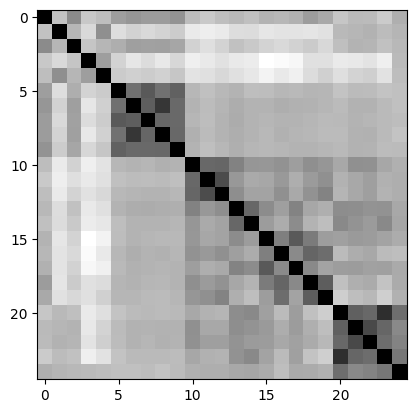

In [18]:
# TEST with the same example in question T6

# Get data where T consist of the first 5 images of each person
img_size = xf[0, 0].shape
T = np.zeros((5, 5, img_size[0], img_size[1]))

for i in range(5):
    T[i] = xf[i, :5]

similarity_matrix = generate_similarity_matrix(T, T)
plt.imshow(similarity_matrix, cmap='gray')
plt.show()

The size of similarity matrix is (120, 280)


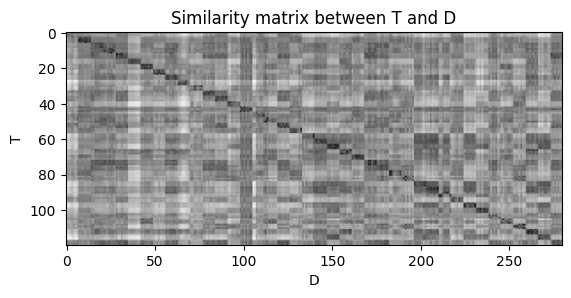

In [19]:
#TODO: Show similariry matrix between T and D.

# INSERT CODE HERE

# Get data where T consist of the first 3 images of each person and D consist of the rest 7 images of each person
T = xf[:, :3]
D = xf[:, 3:]

similarity_matrix = generate_similarity_matrix(T, D)
print(f"The size of similarity matrix is {similarity_matrix.shape}")
plt.imshow(similarity_matrix, cmap='gray')
plt.title("Similarity matrix between T and D")
plt.xlabel("D")
plt.ylabel("T")
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


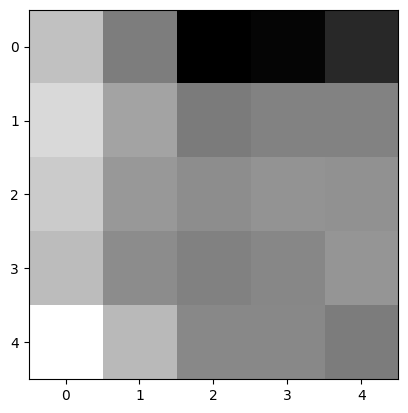

In [20]:
# INSERT CODE HE

plt.imshow(similarity_matrix[5:10, 5:10], cmap='gray')
plt.show()

Distance between the two images is 4.620959221761331


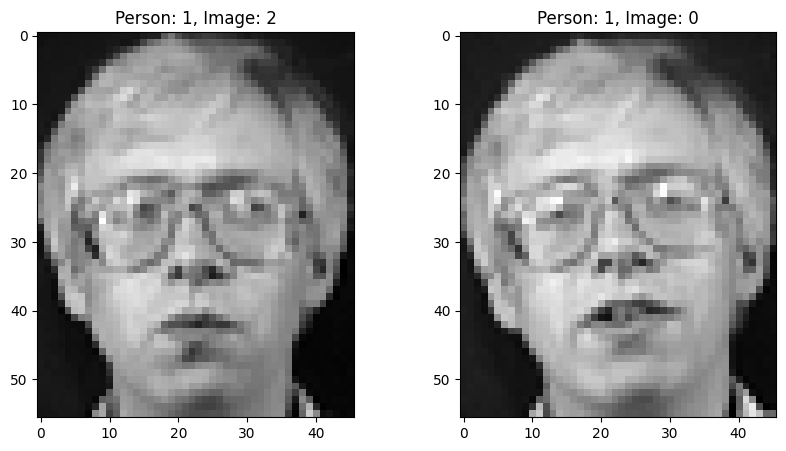

In [21]:
# Index for image in 'black square' in the similarity matrix given [5:10] of T and [5:10] of D
index_T_p = 5 // 3 # First row is 5th row
index_T_im = 5 % 3

index_D_p = 7 // 7 # Row 2 is at the 3rd column
index_D_im = 7 % 7

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(xf[index_T_p, index_T_im], cmap = 'gray')
ax[1].imshow(xf[index_D_p, index_D_im], cmap = 'gray')
ax[0].set_title(f"Person: {index_T_p}, Image: {index_T_im}")
ax[1].set_title(f"Person: {index_D_p}, Image: {index_D_im}")

# Calculate the distance between the two images
dist = L2_dist(xf[index_T_p, index_T_im], xf[index_D_p, index_D_im])
print(f"Distance between the two images is {dist}")

plt.show()

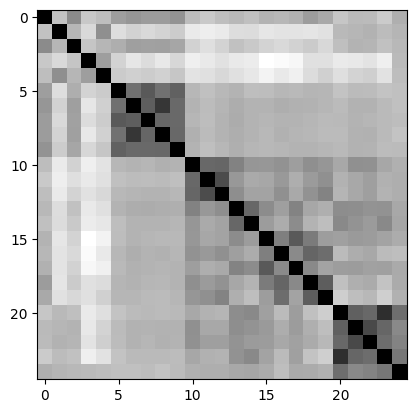

In [22]:
# TEST with the same example in question T6

# Get data where T consist of the first 5 images of each person
img_size = xf[0, 0].shape
T = np.zeros((5, 5, img_size[0], img_size[1]))

for i in range(5):
    T[i] = xf[i, :5]

similarity_matrix = generate_similarity_matrix(T, T)
plt.imshow(similarity_matrix, cmap='gray')
plt.show()

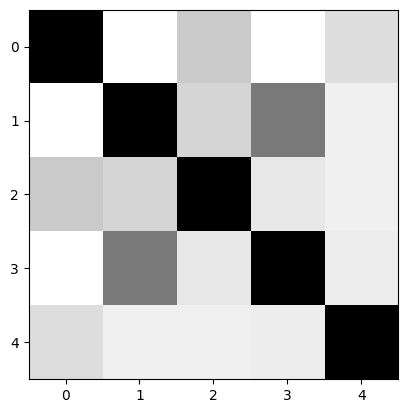

In [23]:
# INSERT CODE HERE

plt.imshow(similarity_matrix[5:10, 5:10], cmap='gray')
plt.show()

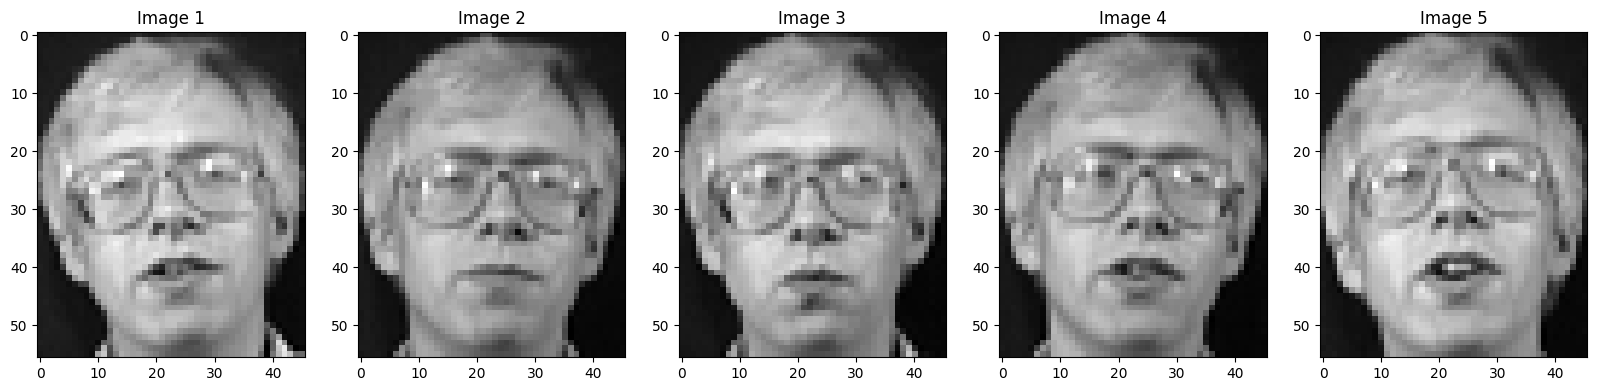

In [24]:
# Plot the image of the second person (fist five images)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    ax[i].imshow(xf[1, i], cmap='gray')
    ax[i].set_title(f"Image {i+1}")

        ANS : The black square between [5:10, 5:10] in the similarity matrix suggests that the images are from the same person as the distance is smaller than when compared with the other images.

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [25]:
# Get data where T consist of the first 3 images of each person and D consist of the rest 7 images of each person
T = xf[:, :3]
D = xf[:, 3:]

similarity_matrix = generate_similarity_matrix(T, D)
print(f"The size of similarity matrix is {similarity_matrix.shape}")

The size of similarity matrix is (120, 280)


In [26]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    N_PERSON = 40
    
    # Thesholding the similarity matrix
    similarity_matrix = (similarity_matrix <= threshold).astype(int)
    
    # Check size of similarity matrix
    n_row = similarity_matrix.shape[0]
    n_col = similarity_matrix.shape[1] # This where test data is
    
    # Calculate the number of image per person
    n_img_per_person_train = int(n_row / N_PERSON)
    n_img_per_person_test = int(n_col / N_PERSON)
    
    tp = []
    fp = []
    for i in range(n_col):
        for j in range(N_PERSON):
            test_p_idx = i // n_img_per_person_test # Person index
            
            # Get the current person index
            start = j * n_img_per_person_train
            end = (j+1) * n_img_per_person_train
            
            # Get the similarity at the current test image
            similarity_score_arr = similarity_matrix[start:end, i]
            similarity_score_total = np.sum(similarity_score_arr)
            
            # If it is the same person and the similarity score is 1 then it is a true positive
            if j == test_p_idx: # If current 'j' person is the same as the current test person
                if similarity_score_total > 0: # Any > 0 is a true positive
                    # Since it is the same as we add more than one but we still count it as the number we added (ex: 3 correct divide number of correct = 3)
                    tp.append(1)
                else:
                    tp.append(0)
            else: # If current 'j' person is not the same as the current test person
                # If anything appear to be above 0 then it is a false positive
                if similarity_score_total > 0: 
                    fp.append(1) 
                else:
                    fp.append(0) # If not then it is a true negative but we dont store it
    
    true_pos_rate = np.sum(tp) / len(tp)
    false_pos_rate = np.sum(fp) / len(fp)

    return true_pos_rate, false_pos_rate

# Quick check
# (true_pos_rate, false_pos_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429, 0.33507326007326005)

In [27]:
# INSERT CODE HERE
evaluate_performance(similarity_matrix, 10)

(0.9964285714285714, 0.4564102564102564)

        ANS: The true positive rate is 0.9964285714285714 and the false alarm rate is 0.4564102564102564 for t = 10.

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [28]:
def calculate_roc(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_pos_rate from the given matrix.
    """

    # INSERT CODE HERE
    tpr_list = []
    far_list = []
    
    # Threshold range
    # Minimum bound will be the min of data and maximum bound will max of data
    minimum_bound = np.min(input_mat) 
    maximum_bound = np.max(input_mat)
    threshold_range = np.linspace(minimum_bound, maximum_bound, 1000)
    
    # Calculate the true positive rate and false positive rate for each threshold
    for threshold in threshold_range:
        true_pos_rate, false_pos_rate = evaluate_performance(input_mat, threshold)
        tpr_list.append(true_pos_rate)
        far_list.append(false_pos_rate)

    return tpr_list, far_list

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    
    tpr_list, far_list = calculate_roc(input_mat)
    plt.plot(far_list, tpr_list)
    plt.show()
    
    return tpr_list, far_list

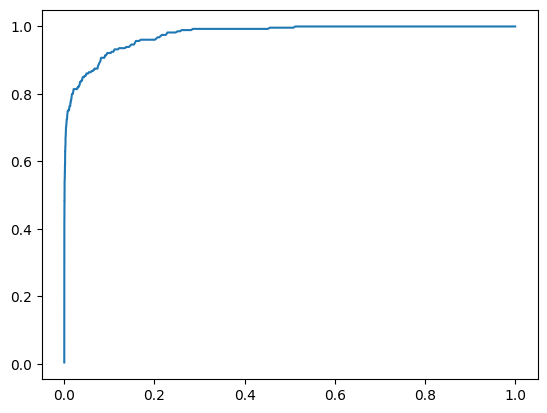

In [29]:
# INSERT CODE HERE
tpr_list, far_list = plot_roc(similarity_matrix)

    ANS: I defined the minimum threshold to be the minimum value and maximum threshold to be the maximum value of the similarity matrix. The RoC curve is generated from at least 1000 threshold levels equally spaced between the minimum and the maximum.

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [30]:
def find_eer(tpr_list, far_list, do_plot=True):
    
    # Make a EER line
    x = np.linspace(0, 1, 1000)
    y = 1- x
    
    # Add zero to the start of far_list and tpr_list for make plot look better
    far_list = [0] + far_list
    tpr_list = [0] + tpr_list
    
    if do_plot:
        # Plot both the RoC and the EER line
        plt.plot(far_list, tpr_list, label="RoC")
        plt.plot(x, y, label="Equal Error Rate Line")

    # Discard the first point since it is (0,0)
    far_list = far_list[1:]
    tpr_list = tpr_list[1:]

    # Calculate the point where the EER line and the RoC curve intersect
    eer_far_point = 0
    eer_tpr_point = 0
    lowest_bound = 1e9
    
    # Find the intersection point
    for x, y in zip(far_list, tpr_list):
        fn = 1.0 - y
        fa = x
        if abs(fn - fa) < lowest_bound:
            eer_far_point = x
            eer_tpr_point = y
            lowest_bound = abs(fn - fa)

    if do_plot:
        # Add vertical line to the intersection point
        plt.axvline(eer_far_point, color='r', linestyle='--', label=f"EER (FN = FA)")
        plt.legend()
        plt.title("Receiver Operating Characteristic (RoC) Curve and Equal Error Rate (EER) Line")
        plt.xlabel("False Alarm Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
    
    return eer_far_point, eer_tpr_point

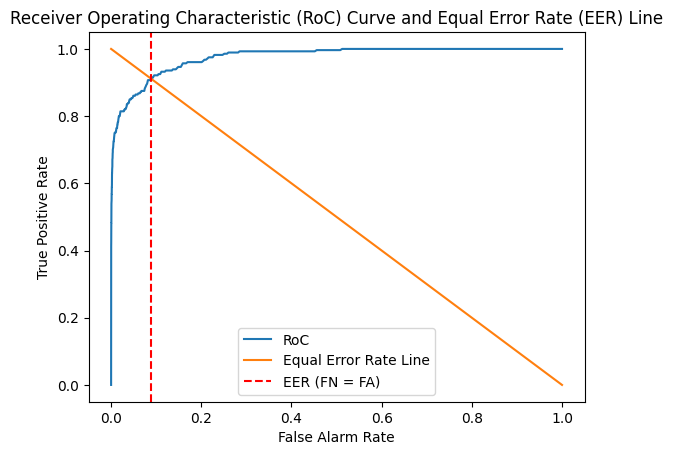

Equal Error Rate (EER): 0.9071428571428571 


In [31]:
# You can add more parameter(s) to the function in the previous question.

# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

eer_far_point, eer_tpr_point = find_eer(tpr_list, far_list)
print(f"Equal Error Rate (EER): {eer_tpr_point} ")

In [32]:
def find_at_far(tpr_list, far_list, far_target=0.1):
    
    # Add zero to the start of far_list and tpr_list for make plot look better
    far_list = [0] + far_list
    tpr_list = [0] + tpr_list
    
    # Plot both the RoC and the EER line
    plt.plot(far_list, tpr_list, label="RoC")

    # Discard the first point since it is (0,0)
    far_list = far_list[1:]
    tpr_list = tpr_list[1:]

    # Calculate the point where the EER line and the RoC curve intersect
    eer_far_point = 0
    eer_tpr_point = 0
    lower_bound = 1e6
    
    # Find the intersection point
    for x, y in zip(far_list, tpr_list):
        fa = x
        if abs(fa - far_target) < lower_bound:
            eer_far_point = x
            eer_tpr_point = y
            lower_bound = abs(fa - far_target)


    # Add vertical line to the intersection point
    plt.axvline(eer_far_point, color='r', linestyle='--', label=f"Recall rate at {far_target} FAR is {compute_recall(eer_tpr_point)}")
    plt.title(f"The recall rate at {far_target} FAR")
    plt.xlabel("False Alarm Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
    
    return eer_far_point, eer_tpr_point


def compute_recall(tpr):
    fn = 1 - tpr
    recall = tpr / (tpr + fn)
    return recall

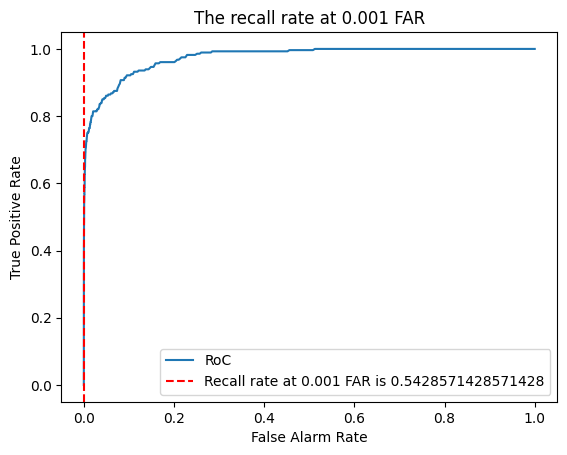

Recall rate at 0.001 false alarm rate is 0.5428571428571428


In [33]:
far_target = 0.001
eer_far_point, eer_tpr_point = find_at_far(tpr_list, far_list, far_target=far_target)

print(f"Recall rate at {far_target} false alarm rate is {compute_recall(eer_tpr_point)}")

    ANS: From the result, the EER is 0.9071428571428571 and the recall rate at 0.1% false alarm rate is 0.5428571428571428.

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

In [34]:
def reload_data():
    # Reload the xf
    xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
    for i in range(data['facedata'].shape[0]):
        for j in range(data['facedata'].shape[1]):
            xf[i,j] = img_as_float(data['facedata'][i,j])

    # Get data where T consist of the first 3 images of each person and D consist of the rest 7 images of each person
    T = xf[:, :3]
    D = xf[:, 3:]

    # Organize the matrix shape to have row vectors consist of all the pixels(flatten)
    T = organize_shape(T)
    D = organize_shape(D)

    return T, D

In [35]:
# Reload data
T, D = reload_data()

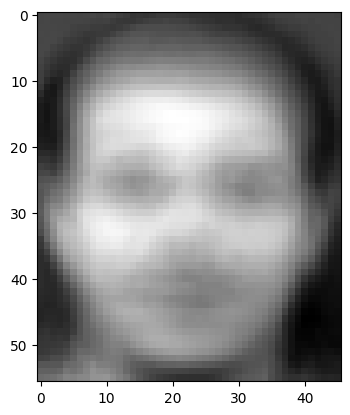

In [36]:
# INSERT CODE HERE
meanface = np.mean(T, axis=0)
plt.imshow(meanface.reshape(56, 46), cmap='gray')
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [37]:
# TODO: Find the size and the rank of the covariance matrix.

# Compute the covariance matrix size
cov_size = T.shape[1]

# Compute the rank of the covariance matrix (number of samples - 1)
cov_rank = T.shape[0] - 1

In [38]:
print(f"The size of the covariance matrix is {cov_size}x{cov_size}")
print(f"The rank of the covariance matrix is {cov_rank}")

The size of the covariance matrix is 2576x2576
The rank of the covariance matrix is 119


In [39]:
# To check if it is reall true. Let's compute the covariance matrix and check the rank of it
cov = np.cov((T - meanface).T) # Transpose to make it column vectors

# Rank of the covariance matrix
cov_rank = np.linalg.matrix_rank(cov)

print(f"The size of the covariance matrix is {cov.shape[0]}x{cov.shape[1]}")
print(f"The rank of the covariance matrix is {cov_rank}")

The size of the covariance matrix is 2576x2576
The rank of the covariance matrix is 119


    ANS: The size of the covariance matrix is 2576x2576. The rank of the covariance matrix is 119


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [40]:
# TODO: Compute gram matrix.
gram_matrix = np.dot(T - meanface, (T - meanface).T) # Do the inner product: the matrix originally is row vectors

# Compute the rank of gram matrix
gram_rank = np.linalg.matrix_rank(gram_matrix)

In [41]:
# TODO: Show size and rank of Gram matrix.
print(f"The size of the Gram matrix is {gram_matrix.shape[0]}x{gram_matrix.shape[1]}")
print(f"The rank of the Gram matrix is {gram_rank}")

The size of the Gram matrix is 120x120
The rank of the Gram matrix is 119


    ANS: The size of the Gram matrix is 120x120. The rank of the Gram matrix is 119. Thus, the number of non-zero eigenvalues is 119.


## T14. Is the Gram matrix also symmetric? Why?


In [42]:
# Check its transpose
print(f"Is gram matrix symmetric? {np.all(gram_matrix == gram_matrix.T)}")

Is gram matrix symmetric? True


    ANS: Yes the Gram matrix is symmetric! We can easility proof this by:
Saying that $X^TX$ is symmetric because $(X^TX)^T = X^T(X^T)^T = X^TX$

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [43]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    
    # Get index in descending order
    idx = eigenvalues.argsort()[::-1]
    
    # Sort by idx
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx] # Since it is column vectors

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [44]:
# check for non-zero eigenvectors
print(f"Number of non-zero eigenvalues: {np.sum(eigenvalues > 1e-6)}") # The value very close to zero (numerial error) so treat as zero

# Show the value of eigenvalue that is correspond to zero eigenvector
print(f"The value of eigenvalue that is zero {eigenvalues[-1]}")

Number of non-zero eigenvalues: 119
The value of eigenvalue that is zero -1.260011864971172e-14


    ANS: There are  119 non-zero eigenvalues.

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

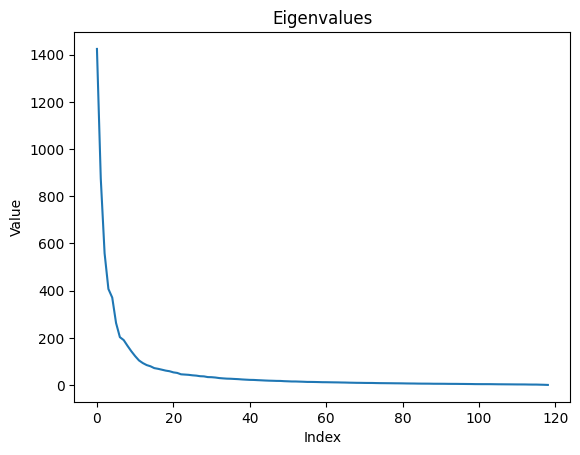

In [45]:
# INSERT CODE HERE

# Plot the eigenvalues
plt.plot(eigenvalues[:-1])
plt.title("Eigenvalues")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [46]:
# Total varaince
total_variance = np.sum(eigenvalues)

# 95% of the total variance
variance_95 = 0.95 * total_variance

# Calculate how many to eigenvectors to keep
n_eigenvectors = 0
cumulative_variance = 0
for i in range(len(eigenvalues)):
    # Store the cummulative variance
    cumulative_variance += eigenvalues[i]
    if cumulative_variance >= variance_95:
        # Check if the cummulative variance is greater than or equal 95% of the total variance then return the number of eigenvectors
        n_eigenvectors = i + 1
        break

print(f"Number of eigenvectors to keep: {n_eigenvectors}")

Number of eigenvectors to keep: 64


    ANS:

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [47]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

# Compute the v by X^T(row vectors -> column vectors) multiply with v_gram
v = np.dot((T - meanface).T, eigenvectors)
print(v.shape)

# Check its vector magnitude
print(f"Vector magnitude of v: {np.linalg.norm(v[:, 0])}")

# Normalize the v
v = v / np.linalg.norm(v, axis=0)
print(f"Vector magnitude of v after normalization: {np.linalg.norm(v[:, 0])}")

(2576, 120)
Vector magnitude of v: 37.73499324020282
Vector magnitude of v after normalization: 1.0000000000000004


In [48]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

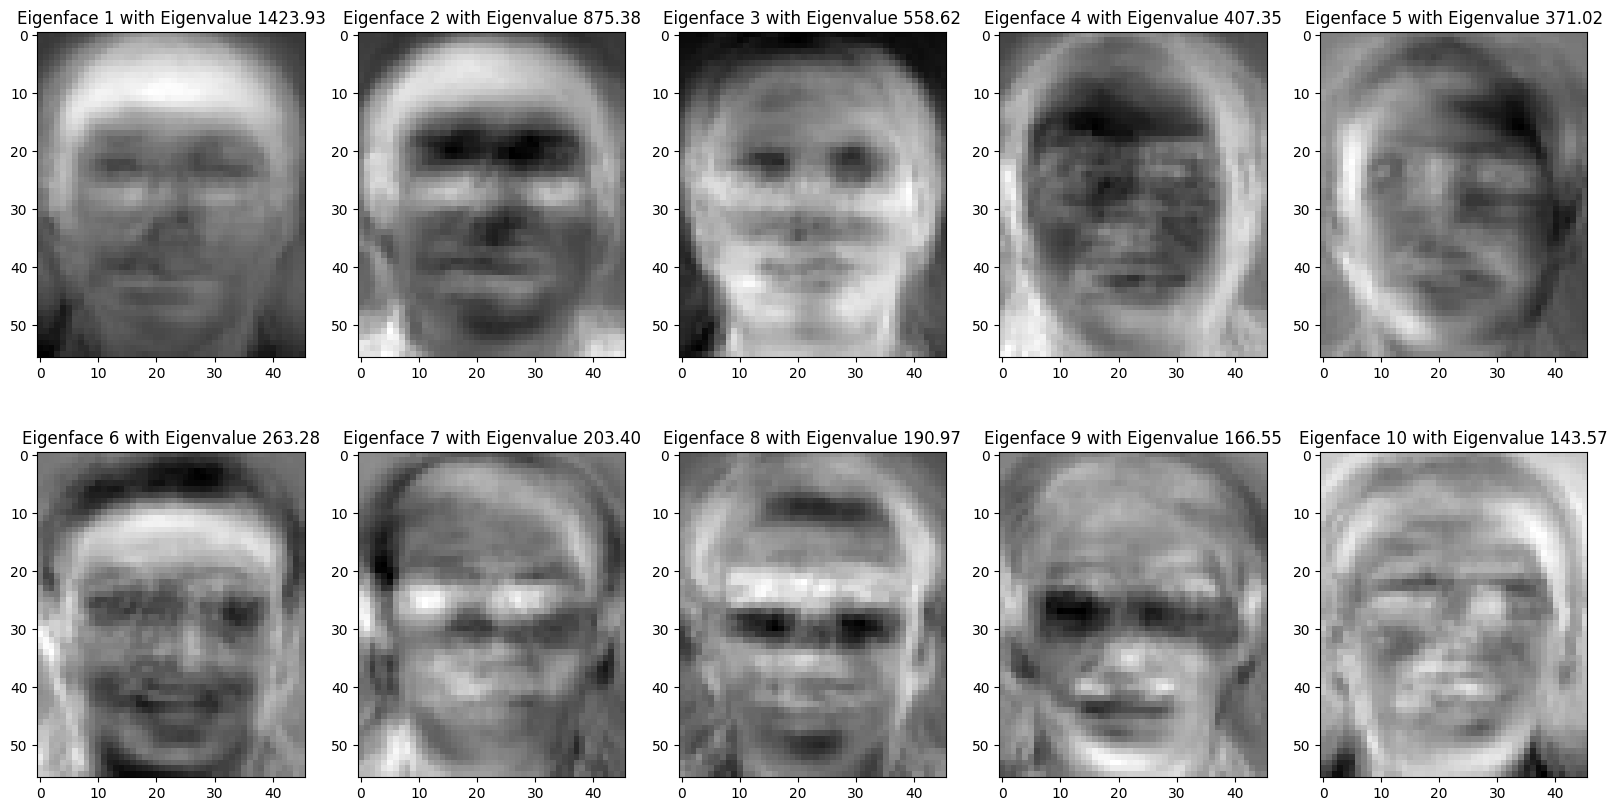

In [49]:
# TODO: Show the first 10 eigenvectors as images.

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(v[:, i*5 + j].reshape(56, 46), cmap='gray')
        ax[i, j].set_title(f"Eigenface {i*5 + j + 1} with Eigenvalue {eigenvalues[i*5 + j]:.2f}")

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

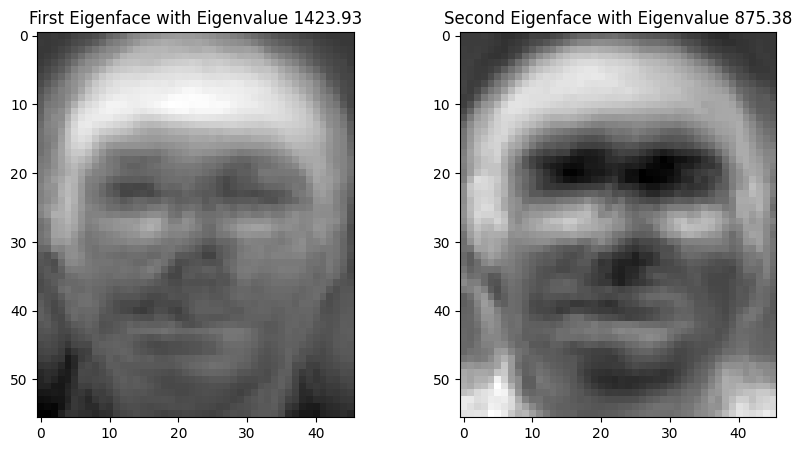

In [50]:
# Plot first and second eigenface
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(v[:, 0].reshape(56, 46), cmap='gray')
ax[0].set_title(f"First Eigenface with Eigenvalue {eigenvalues[0]:.2f}")
ax[1].imshow(v[:, 1].reshape(56, 46), cmap='gray')
ax[1].set_title(f"Second Eigenface with Eigenvalue {eigenvalues[1]:.2f}")
plt.show()

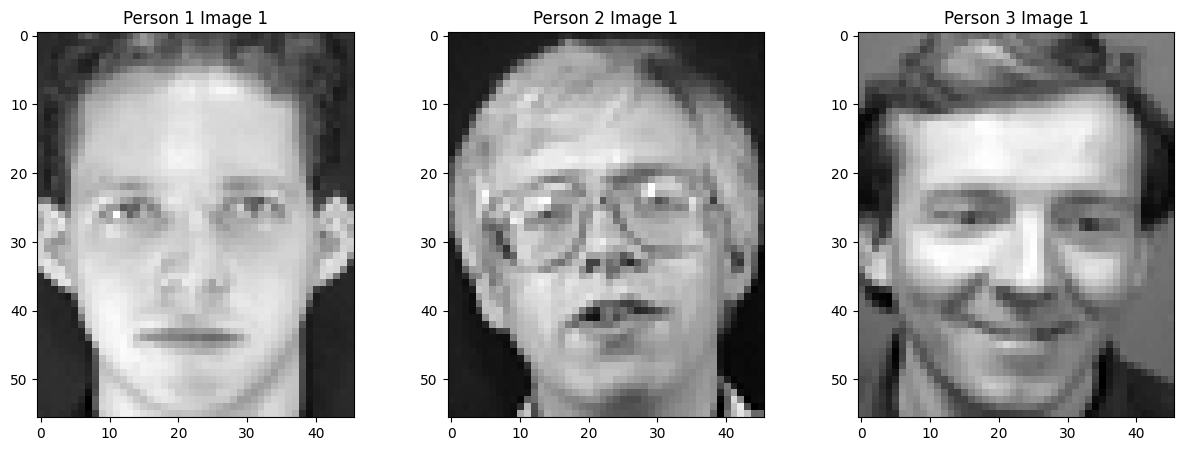

In [51]:
# Plot three different people
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(xf[0, 0], cmap='gray')
ax[0].set_title("Person 1 Image 1")
ax[1].imshow(xf[1, 0], cmap='gray')
ax[1].set_title("Person 2 Image 1")
ax[2].imshow(xf[2, 0], cmap='gray')
ax[2].set_title("Person 3 Image 1")
plt.show()

    ANS: Since the these eigenvectors are derived from the covariance matrix which captures the most variance direction when doing the projection on these vectors, the first eigenvector(from sorted eigenvalues) represents the direction of the most variance in the data which in this case clearly represents the hair which is highlighted in white area. The second eigenvector highlighted the area under the eyes, the outline of face, a little of neck area, and some area around the mouth. This make sense because as we can see from the dataset people usually have different hair style and face shape and details.

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [52]:
# Reload data
T, D = reload_data()

In [53]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE
    
    # DETAIL: We have matrix which is 'matrix' containing row vectors (n x d) and meanface (1 x d) and v (d x k)
    
    # Subtract the meanface from the matrix
    no_mean_matrix = matrix - meanface
    
    # Do the projection on the v
    projection_vectors = np.dot(no_mean_matrix, v)

    return projection_vectors

In [54]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
D_reduced = calculate_projection_vectors(D, meanface, v)[:, :k]


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

The size of similarity matrix is (120, 280)


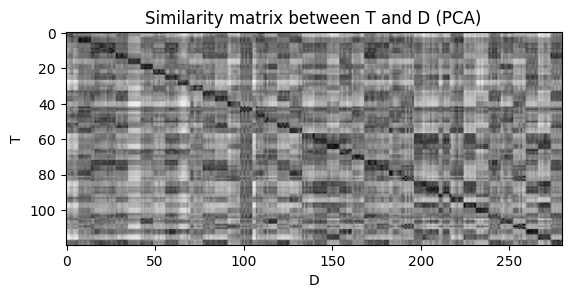

In [55]:
# TODO: Get similarity matrix of T_reduced and D_reduced

similarity_matrix_reduced = generate_similarity_matrix(T_reduced, D_reduced)
print(f"The size of similarity matrix is {similarity_matrix_reduced.shape}")
plt.imshow(similarity_matrix_reduced, cmap='gray')
plt.title("Similarity matrix between T and D (PCA)")
plt.xlabel("D")
plt.ylabel("T")
plt.show()

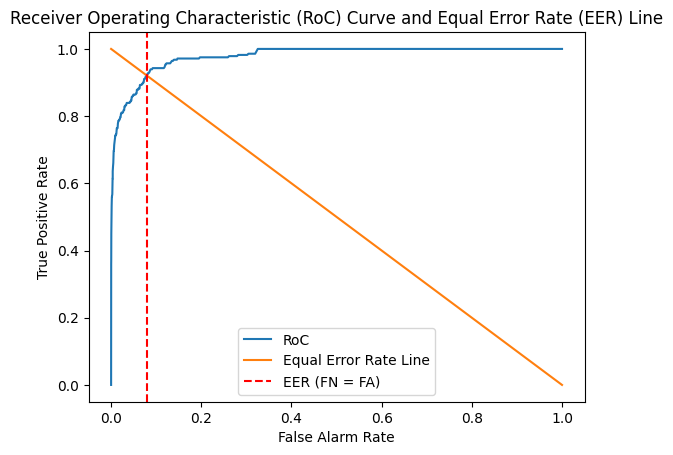

Equal Error Rate (EER): 0.9214285714285714 


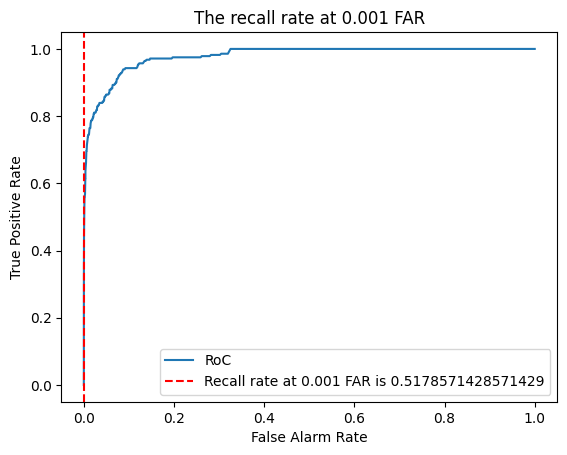

Recall rate at 0.001 false alarm rate is 0.5178571428571429


In [56]:
# TODO: Find EER and the recall rate at 0.1% FAR.

# Calculate tp and fa
tpr_list_reduced, far_list_reduced = calculate_roc(similarity_matrix_reduced)

# Calculate EER
eer_far_point_reduced, eer_tpr_point_reduced = find_eer(tpr_list_reduced, far_list_reduced)
print(f"Equal Error Rate (EER): {eer_tpr_point_reduced} ")


# Calculate Recall
far_target = 0.001
eer_far_point_reduced, eer_tpr_point_reduced = find_at_far(tpr_list_reduced, far_list_reduced, far_target=far_target)
recall_reduced = compute_recall(eer_tpr_point_reduced)
print(f"Recall rate at {far_target} false alarm rate is {recall_reduced}")

    ANS: The EER is 0.9214285714285714 and the Recall is 0.5178571428571429

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [57]:
# INSERT CODE HERE
k_lists = list(range(5, 15))

best_eer = []

for single_k in k_lists:
    T_reduced = calculate_projection_vectors(T, meanface, v)[:, :single_k]
    D_reduced = calculate_projection_vectors(D, meanface, v)[:, :single_k]
    
    similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)
    tpr_list, far_list = calculate_roc(similarity_matrix)
    eer_far_point, eer_tpr_point = find_eer(tpr_list, far_list, do_plot=False)
    
    best_eer.append(eer_tpr_point)
    print(f"Equal Error Rate (EER) at k={single_k}: {eer_tpr_point} ")

# Print the best k
best_k = np.argmax(best_eer)
print(f"The best k={k_lists[best_k]} is {best_eer[best_k]}")

Equal Error Rate (EER) at k=5: 0.8928571428571429 
Equal Error Rate (EER) at k=6: 0.9071428571428571 
Equal Error Rate (EER) at k=7: 0.9071428571428571 
Equal Error Rate (EER) at k=8: 0.9142857142857143 
Equal Error Rate (EER) at k=9: 0.9178571428571428 
Equal Error Rate (EER) at k=10: 0.9214285714285714 
Equal Error Rate (EER) at k=11: 0.9214285714285714 
Equal Error Rate (EER) at k=12: 0.9142857142857143 
Equal Error Rate (EER) at k=13: 0.9142857142857143 
Equal Error Rate (EER) at k=14: 0.9178571428571428 
The best k=10 is 0.9214285714285714


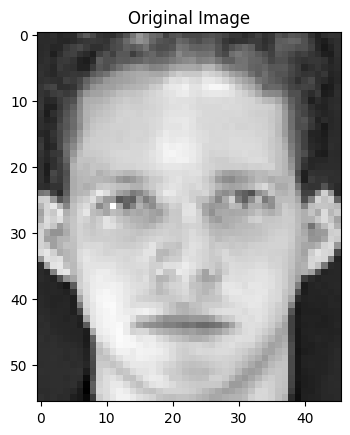

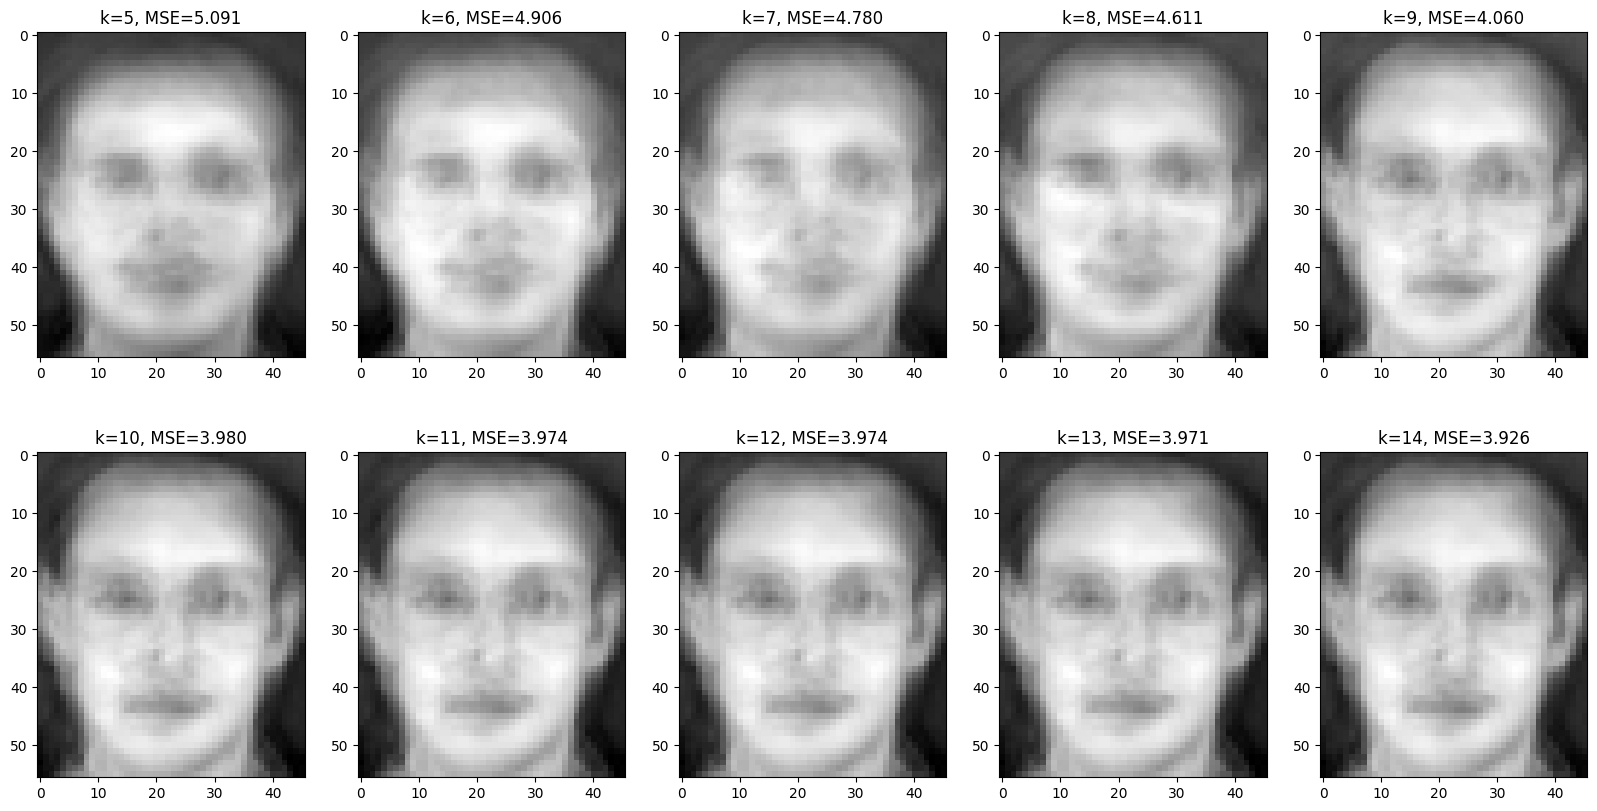

In [58]:
# Test PCA reconstruction

# Reload data
T, D = reload_data()
T_reduced = calculate_projection_vectors(T, meanface, v)
D_reduced = calculate_projection_vectors(D, meanface, v)

def reconstruct_image(projection_vector, meanface, v, k=10):
    """
    Reconstruct the image from PCA projection vector
    where projection_vector is (d, k) and v is (d, n) and meanface is (d, 1)
    """
    
    # Get K projection vector and V
    projection_vector = projection_vector[:, :k]
    v = v[:, :k]
    
    # Reconstruct the image
    reconstructed_image = np.dot(projection_vector, v.T) + meanface
    
    return reconstructed_image
    
# Plot the original image
plt.imshow(xf[0, 0], cmap='gray')
plt.title("Original Image")
plt.show()

# Plot the image with different k value from k_lists with the original image (10 images in total)
k_lists = list(range(5, 15))

fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i in range(2):
    for j in range(5):
        # Calculate current k
        current_k = k_lists[i*5 + j]
        
        # Reconstruct the image
        reconstructed_image = reconstruct_image(T_reduced[0:1], meanface, v, k=current_k)
        
        # Plot the image
        ax[i, j].imshow(reconstructed_image.reshape(56, 46), cmap='gray')
        ax[i, j].set_title(f"k={current_k}, MSE={L2_dist(xf[0, 0], reconstructed_image):.3f}")

plt.show()

    ANS: The best k is 10 and the figure shows that at k=10 the MSE of reconstructed image and original image starts to converge(don't change much).

### OT2. Reconstruct the first image using this procedure. Use k = 10, what is the MSE?

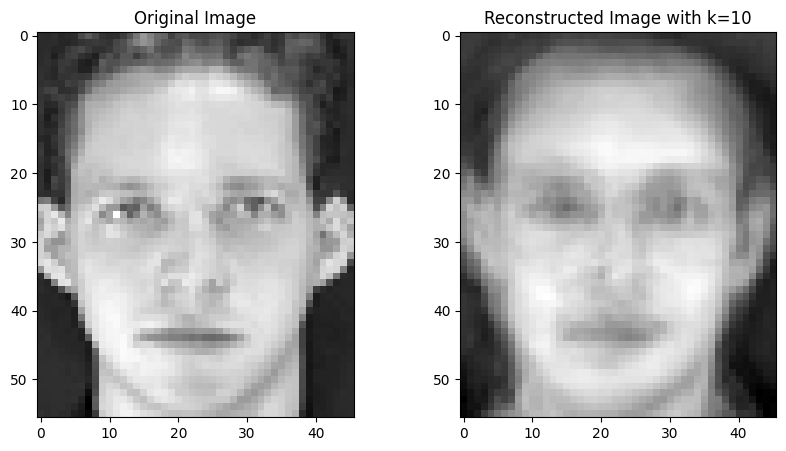

MSE between original and reconstructed image with k=10: 3.980


In [59]:
# Plot the original image and reconstructed image with k=10
reconstructed_image = reconstruct_image(T_reduced[0:1], meanface, v, k=10)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(xf[0, 0], cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(reconstructed_image.reshape(56, 46), cmap='gray')
ax[1].set_title(f"Reconstructed Image with k=10")
plt.show()

print(f"MSE between original and reconstructed image with k=10: {L2_dist(xf[0, 0], reconstructed_image):.3f}")

### OT3. For k values of 1,2,3,...,10,119, show the reconstructed images. Plot the MSE values.

MSE between original and reconstructed image with k=1: 6.901
MSE between original and reconstructed image with k=2: 6.466
MSE between original and reconstructed image with k=3: 5.097
MSE between original and reconstructed image with k=4: 5.097
MSE between original and reconstructed image with k=5: 5.091
MSE between original and reconstructed image with k=6: 4.906
MSE between original and reconstructed image with k=7: 4.780
MSE between original and reconstructed image with k=8: 4.611
MSE between original and reconstructed image with k=9: 4.060
MSE between original and reconstructed image with k=10: 3.980
MSE between original and reconstructed image with k=119: 0.000


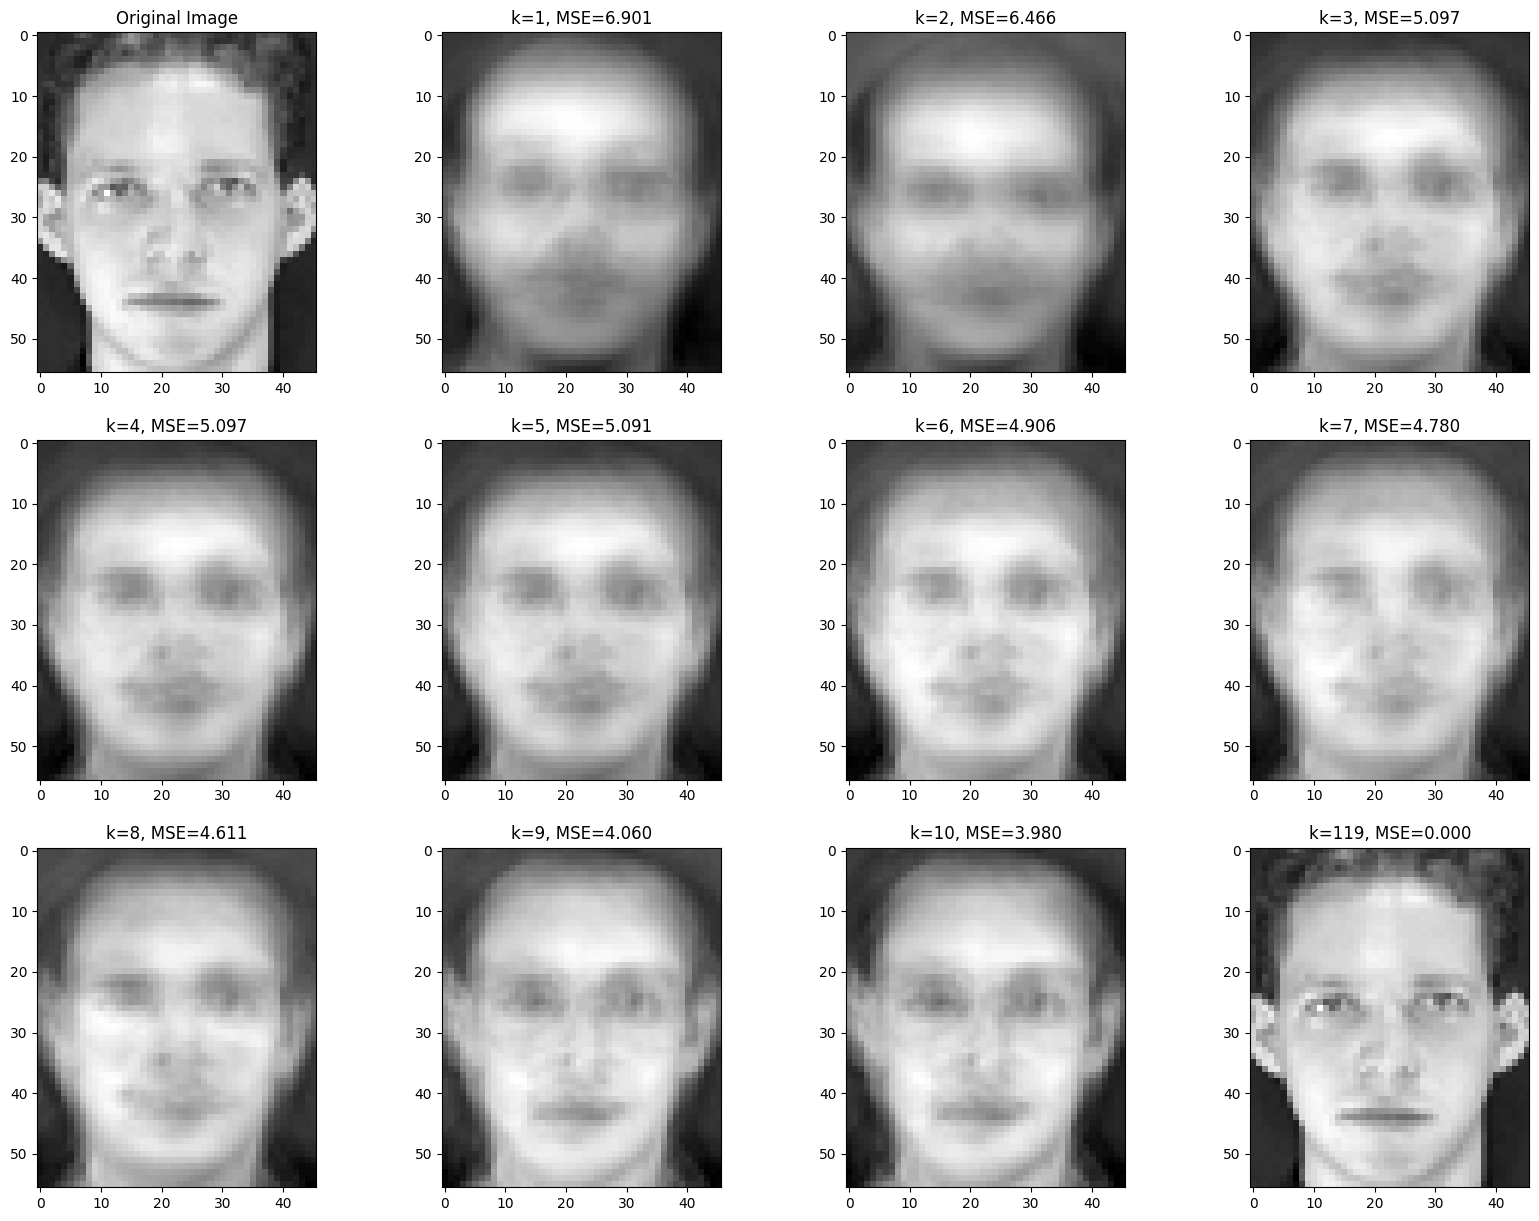

In [60]:
k_lists = [0] + list(range(1, 11)) + [119]

# Plot the image with different k value from k_lists with the original image (12 images in total)
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

MSE_list = []
for i in range(3):
    for j in range(4):
        # Calculate current k
        current_k = k_lists[i*4 + j]
        
        if current_k == 0:
            # Plot the original image
            ax[i, j].imshow(xf[0, 0], cmap='gray')
            ax[i, j].set_title("Original Image")
            MSE_list.append(L2_dist(xf[0, 0], xf[0, 0]))
            continue
        
        # Reconstruct the image
        reconstructed_image = reconstruct_image(T_reduced[0:1], meanface, v, k=current_k)
        
        # Plot the image
        ax[i, j].imshow(reconstructed_image.reshape(56, 46), cmap='gray')
        ax[i, j].set_title(f"k={current_k}, MSE={L2_dist(xf[0, 0], reconstructed_image):.3f}")
        print(f"MSE between original and reconstructed image with k={current_k}: {L2_dist(xf[0, 0], reconstructed_image):.3f}")
        MSE_list.append(L2_dist(xf[0, 0], reconstructed_image))

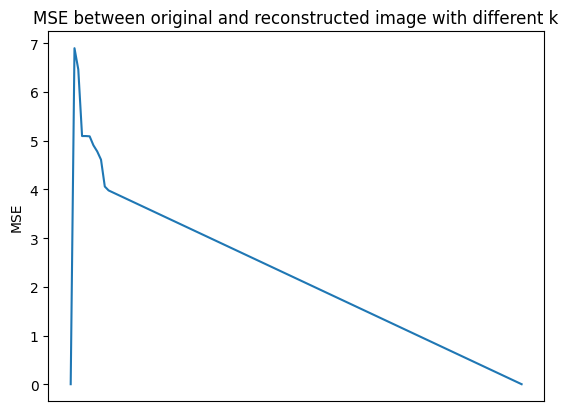

In [61]:
# Plot mse value 
plt.plot(k_lists, MSE_list)
plt.title("MSE between original and reconstructed image with different k")
plt.ylabel("MSE")
# Disable the x-axis label
plt.xticks([])
plt.show()

### OT4. Consider if we want to store 1,000,000 images of this type. How much space do we need? If we would like to compress the database by using the first 10 eigenvalues, how much space do we need? (Assume we keep the projection values, the eigenfaces, and the meanface as 32bit floats)

In [62]:
not_compressed_space = (1e6*2576*32) # n_samples x n_features x 32 bits
compressed_space = (1e6*10*32) + (10*2576*32) + (2576*32) # projection value + eigenface + meanface
bit_to_mb_d = 8_388_608

# Print the result in bits and mb
print(f"Original space: {not_compressed_space} bits or {not_compressed_space/bit_to_mb_d} MB")
print(f"Compressed space: {compressed_space} bits or {compressed_space/bit_to_mb_d} MB")
print(f"It is {not_compressed_space/compressed_space}times smaller")

Original space: 82432000000.0 bits or 9826.66015625 MB
Compressed space: 320906752.0 bits or 38.25506591796875 MB
It is 256.8721271405346times smaller


    ANS: The space we need to store 1,000,000 images is 1,000,000x2576x32 bits which is equal to 9826.67MB. If we compress the database by using the first 10 eigenvalues, we need 
    - 1,000,000x10x32 bits for 10 eigenvalues (projection values)
    - 10x2576x32 bits for 10 eigenfaces
    - 2576x32 bits for the meanface

    The total of compressed space is 38.256MB which is around 256 times smaller.


### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

ANS: Since we have 120 images for training and we have 40 different people, we need to keep 80 PCA dimensions in order for $S_W$ to be full rank and invertible.

In [63]:
def get_PCA(data, k):
    """
    Get PCA from the given data and k.
    """
    # Split data into T and D
    T = data[:, :3]
    D = data[:, 3:]
    
    # Organize T and D shape
    T = organize_shape(T)
    D = organize_shape(D)

    # Calculate the in-class mean where T is 3 images of each person(each class)
    n_img_T_per_class = 3
    n_img_D_per_class = 7
    
    # # The return meanface will have shape (40, 1, 2576) for plot
    # T_meanface_per_class = np.mean(T.reshape(40, n_img_T_per_class, -1), axis=1)[:, None, :]
    # D_meanface_per_class = np.mean(D.reshape(40, n_img_D_per_class, -1), axis=1)[:, None, :]
    
    # Calculate the meanface (overall meanface(global))
    meanface = np.mean(T, axis=0)
    
    # Calculate the gram matrix
    gram_matrix = np.dot(T - meanface, (T - meanface).T)
    
    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)
    
    # Compute desired v
    v = np.dot((T - meanface).T, eigenvectors)
    v = v / np.linalg.norm(v, axis=0) # Norm
    
    # Get projection vectors of T and D, then Keep first k projection values.
    T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
    D_reduced = calculate_projection_vectors(D, meanface, v)[:, :k]
    
    # Calculate meanface for T and D for each class
    T_meanface_per_class = np.mean(T_reduced.reshape(40, n_img_T_per_class, -1), axis=1)[:, None, :]
    D_meanface_per_class = np.mean(D_reduced.reshape(40, n_img_D_per_class, -1), axis=1)[:, None, :]
    
    return T_reduced, D_reduced, (T_meanface_per_class, D_meanface_per_class), v

In [64]:
# TODO: Define dimension of PCA.
n_dim = 80

# TODO: Find PCA of T and D with n_dim dimension.

# Reload data
T_reduced, D_reduced, (T_meanface_per_class, D_meanface_per_class), pca_eigenvectors = get_PCA(xf, n_dim)

# check rank of T_reduced and D_reduced
print(f"Rank of T_reduced: {np.linalg.matrix_rank(T_reduced)}")
print(f"Rank of D_reduced: {np.linalg.matrix_rank(D_reduced)}")

Rank of T_reduced: 80
Rank of D_reduced: 80


In [65]:
# Constructing S_W
mean_diff = (T_reduced.reshape(40, 3, -1) - T_meanface_per_class).reshape(T_reduced.shape[0], -1)
S_W = np.dot(mean_diff.T, mean_diff) # Since the mean_diff is row vectors then we just swap from what we see from lecture

# Check rank and if S_W is invertible
print(f"Rank of S_W: {np.linalg.matrix_rank(S_W)}")
print(f"Is S_W invertible?: {np.linalg.det(S_W) != 0}")

# Try to inverse S_W
S_W_inv = np.linalg.inv(S_W)

Rank of S_W: 80
Is S_W invertible?: True


### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [66]:
def calculate_eigenvectors_and_eigenvalues_complex(matrix):

    # INSERT CODE HERE
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    # Get index in descending order
    idx = eigenvalues.argsort()[::-1]
    
    # Sort by idx
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx] # Since it is column vectors

    return eigenvalues, eigenvectors

In [67]:
# TODO: Find the LDA projection.

def get_LDA(data):
    n_dim = 80
    
    T_reduced, D_reduced, (T_meanface_per_class, D_meanface_per_class), pca_eigenvectors = get_PCA(xf, n_dim)
    
    # ------------------Calculate S_W-----------------
    # Get the mean difference and compute S_W
    mean_diff_sw = (T_reduced.reshape(40, 3, -1) - T_meanface_per_class).reshape(T_reduced.shape[0], -1)
    S_W = np.dot(mean_diff_sw.T, mean_diff_sw) # Since the mean_diff is row vectors then we just swap from what we see from lecture
    print(f"Rank of S_W: {np.linalg.matrix_rank(S_W)} which is N-C")

    # ------------------Calculate S_B-----------------
    
    # Calculate the global mean and compute S_B
    global_mean = np.mean(T_reduced, axis=0)
    mean_diff_sb = (T_meanface_per_class.reshape(40, -1) - global_mean)
    S_B = np.dot(mean_diff_sb.T, mean_diff_sb)
    print(f"Rank of S_B: {np.linalg.matrix_rank(S_B)} which is C-1")
    
    # ------------------Calculate eigenvectors-----------------
    S_W_inv = np.linalg.inv(S_W)
    lda = np.dot(S_W_inv, S_B)
    # Check if lda is symmetric
    print(f"Is lda symmetric?: {np.all(lda == lda.T)}")
    
    lda_eigenvalues, lda_eigenvectors = calculate_eigenvectors_and_eigenvalues_complex(lda)
    
    
    # ------------------Calculate LDA projection-----------------
    projection_vectors_T = np.dot((T_reduced), lda_eigenvectors).T
    projection_vectors_D = np.dot((D_reduced), lda_eigenvectors).T
    
    return projection_vectors_T, projection_vectors_D, (lda_eigenvalues, lda_eigenvectors), pca_eigenvectors, global_mean


projection_vectors_T, projection_vectors_D, (lda_eigenvalues, lda_eigenvectors), pca_eigenvectors, global_mean = get_LDA(xf)

Rank of S_W: 80 which is N-C
Rank of S_B: 39 which is C-1
Is lda symmetric?: False


In [68]:
# TODO: Find how many non-zero eigenvalues there are.

# Check the number of non-zero eigenvalues
print(f"Number of non-zero eigenvalues: {np.sum(lda_eigenvalues > 1e-6)}") # The value very close to zero (numerial error) so treat as zero

Number of non-zero eigenvalues: 39


ANS: The $S_{W}^{-1}S_{B}$ is not symmetric and we cannot use the ``numpy.linalg.eigh`` so that we have to change to use the ``numpy.linalg.eig``. There are 39 non-zero eigenvalues which is what we expected.

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

/tmp/ipykernel_17242/1879601198.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  p_pca_lda_T_reconstructed = np.dot(lda_T_reconstructed, selected_pca_eigenvectors.T).astype(float) + meanface
/tmp/ipykernel_17242/1879601198.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  p_pca_lda_D_reconstructed = np.dot(lda_D_reconstructed, selected_pca_eigenvectors.T).astype(float) + meanface


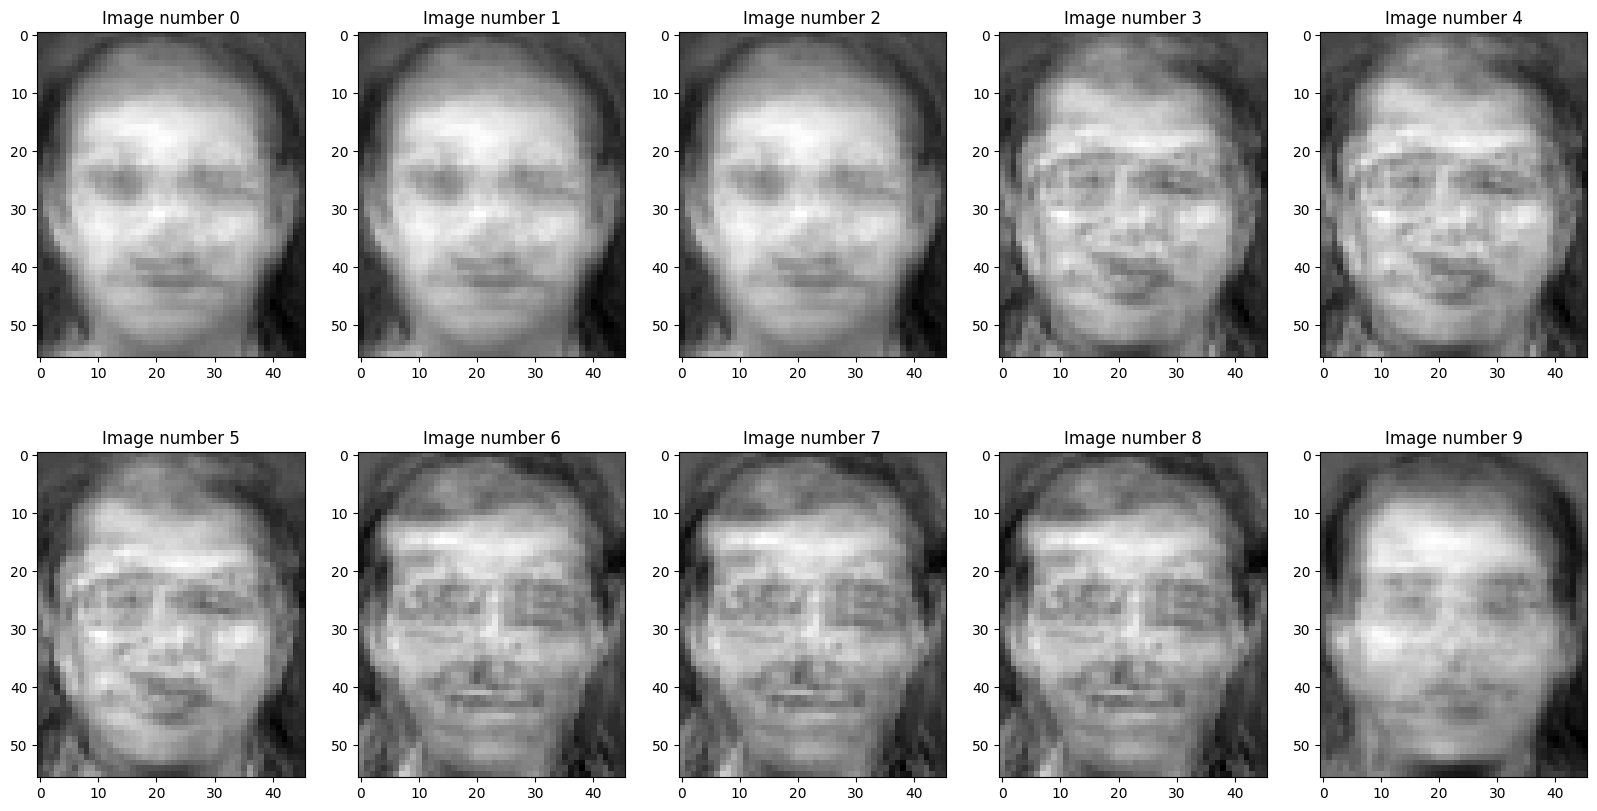

In [69]:
# INSERT CODE HERE

# Select best k from LDA projection
k = 10
projected_lda_T = projection_vectors_T[:k]
projected_lda_D = projection_vectors_D[:k]
selected_lda_eigenvectors = lda_eigenvectors[:, :k]


# LDA eigen for reconstrcution
lda_T_reconstructed = np.dot(selected_lda_eigenvectors, projected_lda_T).T
lda_D_reconstructed = np.dot(selected_lda_eigenvectors, projected_lda_D).T

# Reconstruct back to PCA
selected_pca_eigenvectors = pca_eigenvectors[:, :n_dim]


# Convert from LDA -> PCA
p_pca_lda_T_reconstructed = np.dot(lda_T_reconstructed, selected_pca_eigenvectors.T).astype(float) + meanface
p_pca_lda_D_reconstructed = np.dot(lda_D_reconstructed, selected_pca_eigenvectors.T).astype(float) + meanface

# Plot the original image and reconstructed image with k=10
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i in range(2):
    for j in range(5):
        # Calculate current k
        current_k = i*5 + j
        
        # Plot the image
        ax[i, j].imshow(p_pca_lda_T_reconstructed[current_k].reshape(56, 46), cmap='gray')
        ax[i, j].set_title(f"Image number {current_k}")

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

Rank of S_W: 80 which is N-C
Rank of S_B: 39 which is C-1
Is lda symmetric?: False


/tmp/ipykernel_17242/2631955302.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  similarity_matrix[i, j] = L2_dist(A[i].astype(float), B[j].astype(float))


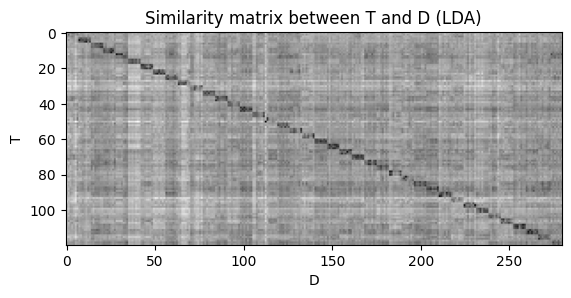

In [70]:
# INSERT CODE HERE
projection_vectors_T, projection_vectors_D, (lda_eigenvalues, lda_eigenvectors), pca_eigenvectors, global_mean = get_LDA(xf)

# Create similarity matrix
similarity_matrix_lda = generate_similarity_matrix(projection_vectors_T.T, projection_vectors_D.T)

# Plot the similarity matrix
plt.imshow(similarity_matrix_lda, cmap='gray')
plt.xlabel("D")
plt.ylabel("T")
plt.title("Similarity matrix between T and D (LDA)")
plt.show()

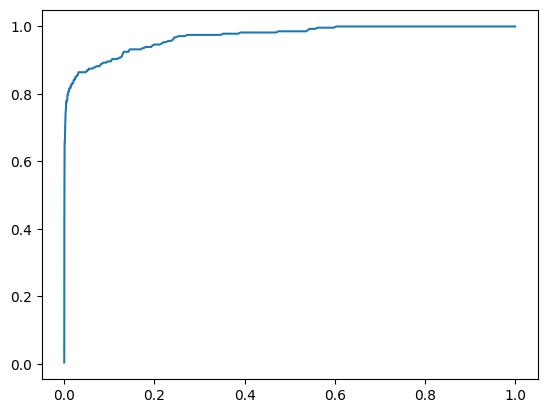

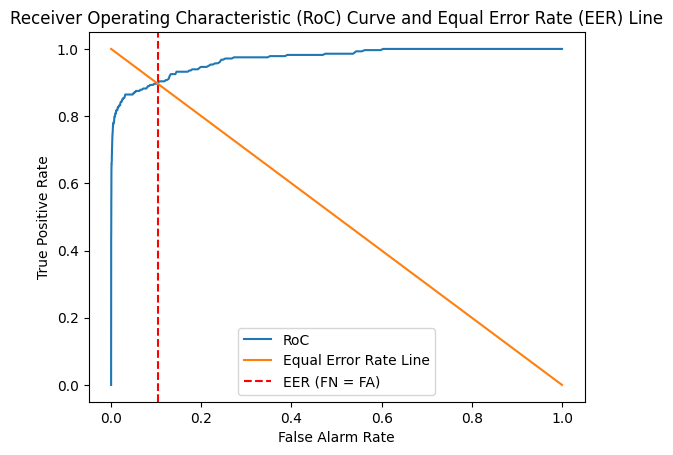

Equal Error Rate (EER): 0.8964285714285715 


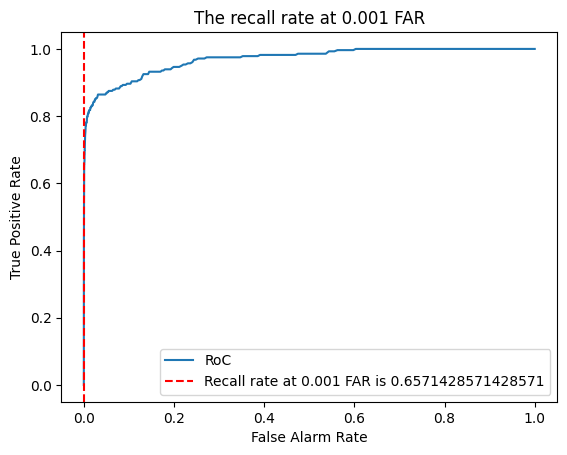

Recall rate at 0.001 false alarm rate is 0.6571428571428571


In [71]:
# Create RoC curve
tpr_list_lda, far_list_lda = plot_roc(similarity_matrix_lda)

# Find EER
eer_far_point_lda, eer_tpr_point_lda = find_eer(tpr_list_lda, far_list_lda)
print(f"Equal Error Rate (EER): {eer_tpr_point_lda} ")

# Find Recall
far_target = 0.001
eer_far_point_lda, eer_tpr_point_lda = find_at_far(tpr_list_lda, far_list_lda, far_target=far_target)
recall_lda = compute_recall(eer_tpr_point_lda)
print(f"Recall rate at {far_target} false alarm rate is {recall_lda}")

    ANS: EER for this is 0.9607142857142857 and Recall rate at 0.1% FAR is 0.7392857142857143

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

In [72]:
# INSERT CODE HERE
tpr_list, far_list = calculate_roc(similarity_matrix)
tpr_list_pca, far_list_pca = calculate_roc(similarity_matrix_reduced)
tpr_list_lda, far_list_lda = calculate_roc(similarity_matrix_lda)

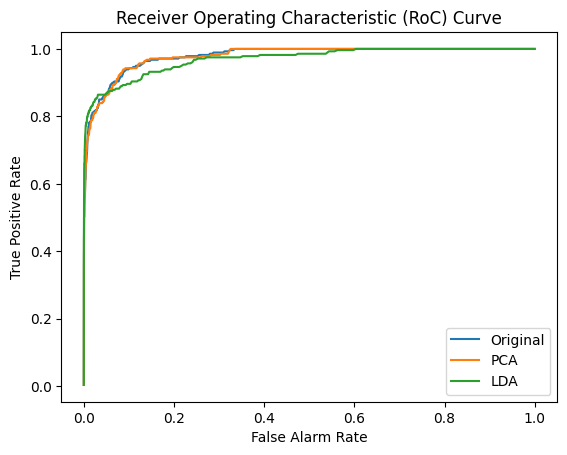

In [73]:
# Plot three RoC curves on the same plot
plt.plot(far_list, tpr_list, label="Original")
plt.plot(far_list_pca, tpr_list_pca, label="PCA")
plt.plot(far_list_lda, tpr_list_lda, label="LDA")
plt.legend()
plt.title("Receiver Operating Characteristic (RoC) Curve")
plt.xlabel("False Alarm Rate")
plt.ylabel("True Positive Rate")
plt.show()

    ANS: As we can see from the figure, the PCA+LDA (fisherface) has the best RoC curve compared to PCA and no projection because LDA's objective is to maximize the distance between different classes(people) and minimize the distance within the same class(people) which is the best for face verification! As we can clearly see from the figure that there is a area that the fisherface outperform both methods in the area in the beginning of the curve (0.0 - 0.1)

### OT5. Plot the first two LDA dimensions of the test images from different people (6 people 7 images each). Use a different color for each person. Observe the clustering of between each person. Repeat the same steps for the PCA projections. Does it come out as expected?

Rank of S_W: 80 which is N-C
Rank of S_B: 39 which is C-1
Is lda symmetric?: False


/home/phonphrm/miniconda3/envs/pattern/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/phonphrm/miniconda3/envs/pattern/lib/python3.10/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


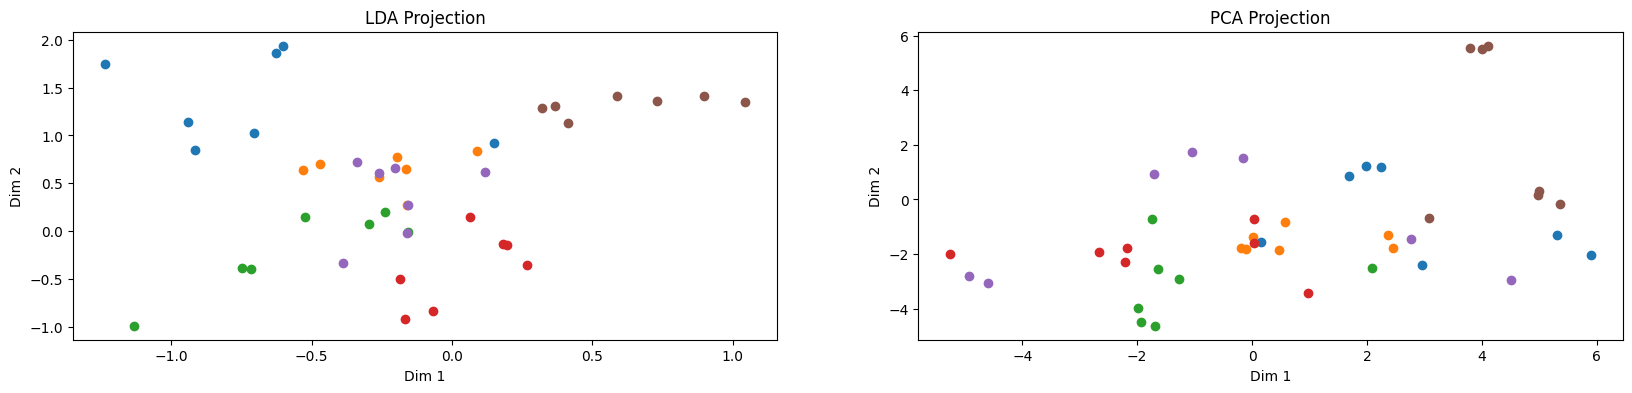

In [74]:
# INSERT CODE HERE
projection_vectors_T, projection_vectors_D, (lda_eigenvalues, lda_eigenvectors), pca_eigenvectors, global_mean = get_LDA(xf)

# Get the index for 6 people and 7 images each
n_image_per_class_test = 7

# Get LDA projection vectors for 6 people with first 2 dimensions
LDA_people = []
for i in range(6):
    idx_start = i * n_image_per_class_test
    idx_end = (i + 1) * n_image_per_class_test
    LDA_people.append(projection_vectors_D[:2, idx_start:idx_end])

# Get PCA projection vectors for 6 people with first 2 dimensions
PCA_people = []
for i in range(6):
    idx_start = i * n_image_per_class_test
    idx_end = (i + 1) * n_image_per_class_test
    PCA_people.append(T_reduced.T[:2, idx_start:idx_end])

# Plot in the same figure with different color
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

for i in range(6):
    ax[0].scatter(LDA_people[i][0], LDA_people[i][1], label=f"Person: {i+1}")
    ax[1].scatter(PCA_people[i][0], PCA_people[i][1], label=f"Person: {i+1}")

ax[0].set_title("LDA Projection")
ax[1].set_title("PCA Projection")
ax[0].set_xlabel("Dim 1")
ax[0].set_ylabel("Dim 4")
ax[2].set_xlabel("Dim 1")
ax[2].set_ylabel("Dim 2")
# ax[1].legend()
# ax[1].legend()
plt.show()

    ANS : The answer is what I expected to get as we can see that the LDA clearly separates the different people's images better than PCA. Also, the LDA minimize the distance within the same class whereas the PCA clearly fails to do so.